![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

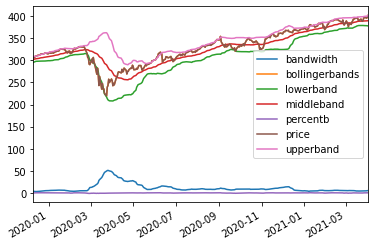

In [ ]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/research/overview]
qb = QuantBook()
spy = qb.AddEquity("SPY")
history = qb.History(qb.Securities.Keys, 360, Resolution.Daily)

# Indicator Analysis
bbdf = qb.Indicator(BollingerBands(30, 2), spy.Symbol, 360, Resolution.Daily)
bbdf.drop('standarddeviation', 1).plot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

qb = QuantBook()
spy = qb.AddEquity("SPY").Symbol

#get SPY data from August 2010 to the present
start_date = datetime(2010, 8, 1, 0, 0, 0)
end_date = qb.Time
spy_table = qb.History(spy, start_date, end_date, Resolution.Daily)

spy_total = spy_table[['open','close']]
#calculate log returns
spy_log_return = np.log(spy_total.close).diff().dropna()
print('Population mean:', np.mean(spy_log_return))

Population mean: 0.0005516176334504788


In [ ]:
print('Population standard deviation:',np.std(spy_log_return))

Population standard deviation: 0.010781222229683867


In [ ]:
print('10 days sample returns:', np.mean(spy_log_return.tail(10)))

10 days sample returns: 0.0026323295386376346


In [ ]:
print('10 days sample standard deviation:', np.std(spy_log_return.tail(10)))

10 days sample standard deviation: 0.00715468949906526


In [ ]:
print('1000 days sample returns:', np.mean(spy_log_return.tail(1000)))

1000 days sample returns: 0.0006074586083081054


In [ ]:
print('1000 days sample standard deviation:', np.std(spy_log_return.tail(1000)))

1000 days sample standard deviation: 0.012935993964839899


In [ ]:
#apply the formula above to calculate confidence interval
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
upper_2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
#print the outcomes
print('10 days 95% confidence inverval:', (bottom_1,upper_1))

10 days 95% confidence inverval: (-0.0018021929559560966, 0.007066852033231366)


In [ ]:
print('1000 days 95% confidence inverval:', (bottom_2,upper_2))

1000 days 95% confidence inverval: (-0.00019432260434278396, 0.0014092398209589949)


In [ ]:
mean_1000 = np.mean(spy_log_return.tail(1000))
std_1000 = np.std(spy_log_return.tail(1000))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_1000,std_1000],index = ['mean_10', 'std_10','mean_1000','std_1000'])
print(s)

mean_10      0.002632
std_10       0.007155
mean_1000    0.000607
std_1000     0.012936
dtype: float64


In [ ]:
bottom = 0 - 1.64*std_1000/np.sqrt(1000)
upper = 0 + 1.64*std_1000/np.sqrt(1000)
print((bottom, upper))

(-0.0006708781575242135, 0.0006708781575242135)


In [ ]:
bottom = 0 - 1.96*std_1000/np.sqrt(1000)
upper = 0 + 1.96*std_1000/np.sqrt(1000)
print((bottom, upper))

(-0.0008017812126508894, 0.0008017812126508894)


In [ ]:
print(np.sqrt(1000)*(mean_1000 - 0)/std_1000)

1.4849672872071953


In [ ]:
import scipy.stats as st
print((1 - st.norm.cdf(1.9488)))

0.02565965688799665


In [ ]:
mean_1200 = np.mean(spy_log_return.tail(1200))
std_1200 = np.std(spy_log_return.tail(1200))
z_score = np.sqrt(1200)*(mean_1200 - 0)/std_1200
print('z-score = ',z_score)

z-score =  1.844287314157845


In [ ]:
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)

p_value =  0.032570639644587174
